# 过滤式特征选择

过滤式特征选择即单变量选择法，单变量选择法的主要思路是根据某些统计检验的方法分别对每个变量进行检验，得到一组分数、p-value数据，然后我们排序选择分数最高(或p-value最小等)的那些特征。

In [18]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [19]:
#读取数据
data = pd.read_csv("../data/breast_cancer.csv")
print(data.head())

#准备数据
data = data.dropna()
y = data['label']
x = data.drop(['label'],axis=1).astype('float64')

# 训练集、测试集划分
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state= 42)

       0      1       2       3        4        5       6        7       8  \
0  17.99  10.38  122.80  1001.0  0.11840  0.27760  0.3001  0.14710  0.2419   
1  20.57  17.77  132.90  1326.0  0.08474  0.07864  0.0869  0.07017  0.1812   
2  19.69  21.25  130.00  1203.0  0.10960  0.15990  0.1974  0.12790  0.2069   
3  11.42  20.38   77.58   386.1  0.14250  0.28390  0.2414  0.10520  0.2597   
4  20.29  14.34  135.10  1297.0  0.10030  0.13280  0.1980  0.10430  0.1809   

         9  ...     21      22      23      24      25      26      27  \
0  0.07871  ...  17.33  184.60  2019.0  0.1622  0.6656  0.7119  0.2654   
1  0.05667  ...  23.41  158.80  1956.0  0.1238  0.1866  0.2416  0.1860   
2  0.05999  ...  25.53  152.50  1709.0  0.1444  0.4245  0.4504  0.2430   
3  0.09744  ...  26.50   98.87   567.7  0.2098  0.8663  0.6869  0.2575   
4  0.05883  ...  16.67  152.20  1575.0  0.1374  0.2050  0.4000  0.1625   

       28       29  label  
0  0.4601  0.11890      0  
1  0.2750  0.08902      0  
2 

## SelectPercentile

In [27]:
# f_classif对应分类任务
# f_regression对应回归任务
from sklearn.feature_selection import SelectPercentile, f_classif, f_regression

SelectPercentile在给定一个0到1之间的百分比x%的情况下，选择最好的x%的特征。比如10个特征，前20%的特征就是最好的两个特征，以此类推。

In [55]:
# 选择前50%好的特征
selector = SelectPercentile(score_func=f_classif, percentile=50)
selector.fit(x_train, y_train)
x_train_selected = selector.transform(x_train)
x_train_selected.shape

(426, 15)

In [56]:
# 选择出的特征列
selector.get_feature_names_out(selector.feature_names_in_)

array(['0', '2', '3', '5', '6', '7', '10', '12', '13', '20', '22', '23',
       '25', '26', '27'], dtype=object)

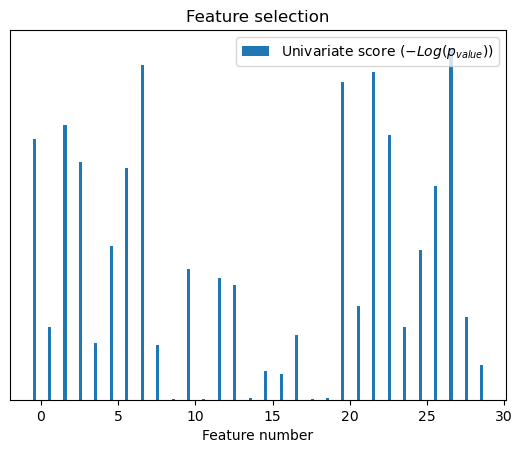

In [57]:
# 绘制特征选择图
plt.figure(1)
plt.clf()
x_indices = np.arange(x_train.shape[-1])
scores = -np.log10(selector.pvalues_)
scores /= scores.max()
plt.bar(x_indices - .45, scores, width=.2, label=r'Univariate score ($-Log(p_{value})$)')
plt.title("Feature selection")
plt.xlabel('Feature number')
plt.yticks(())
plt.axis('tight')
plt.legend(loc='upper right')
plt.show()

## SelectKBest

In [69]:
# f_classif对应分类任务
# f_regression对应回归任务
from sklearn.feature_selection import SelectKBest, f_classif, f_regression

SelectKBest是选取在某种标准下最好的K个特征。

In [70]:
# 选择前50%好的特征
selector = SelectKBest(score_func=f_classif, k=10)
selector.fit(x_train, y_train)
x_train_selected = selector.transform(x_train)
x_train_selected.shape

(426, 10)

In [71]:
# 选择出的特征列
selector.get_feature_names_out(selector.feature_names_in_)

array(['0', '2', '3', '6', '7', '20', '22', '23', '26', '27'],
      dtype=object)

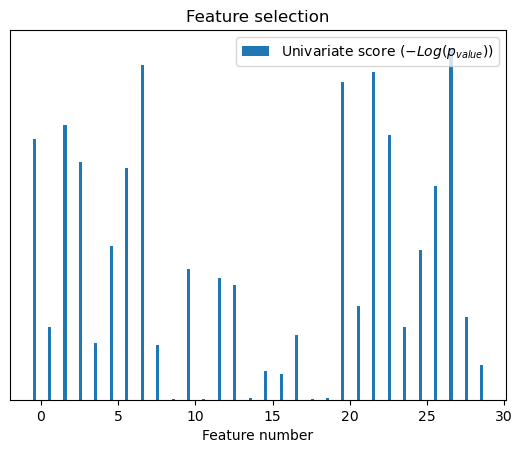

In [72]:
# 绘制特征选择图
plt.figure(1)
plt.clf()
x_indices = np.arange(x_train.shape[-1])
scores = -np.log10(selector.pvalues_)
scores /= scores.max()
plt.bar(x_indices - .45, scores, width=.2, label=r'Univariate score ($-Log(p_{value})$)')
plt.title("Feature selection")
plt.xlabel('Feature number')
plt.yticks(())
plt.axis('tight')
plt.legend(loc='upper right')
plt.show()

## VarianceThreshold

In [73]:
# 方差阈值法
from sklearn.feature_selection import VarianceThreshold

In [75]:
# 使用VarianceThreshold来过滤掉方差在0.6以下的特征
selector = VarianceThreshold(threshold=0.6)
selector.fit(x_train, y_train)
x_train_selected = selector.transform(x_train)
x_train_selected.shape

(426, 10)

In [76]:
# 选择出的特征列
selector.get_feature_names_out(selector.feature_names_in_)

array(['0', '1', '2', '3', '12', '13', '20', '21', '22', '23'],
      dtype=object)

## SelectFpr

In [77]:
from sklearn.feature_selection import SelectFpr, f_classif, f_regression

SelectFpr方法则要求对假设检验有一定的认识。这种方法基于FPR测试，即False Positive Rate，其含义为假阳性率，是指被我们预测为正但实际为负的样本的比例，也就是假设检验中的一类错误发生的比例。

In [85]:
selector = SelectFpr(score_func=f_classif, alpha=0.1)
selector.fit(x_train, y_train)
x_train_selected = selector.transform(x_train)
x_train_selected.shape

(426, 25)

In [86]:
# 选择出的特征列
selector.get_feature_names_out(selector.feature_names_in_)

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '10', '12', '13',
       '15', '16', '17', '20', '21', '22', '23', '24', '25', '26', '27',
       '28', '29'], dtype=object)

## SelectFdr

In [87]:
from sklearn.feature_selection import SelectFdr, f_classif, f_regression

SelectFdr则是根据错误发现率（FDR，False Discovery Rate）来为特征排序。错误发现率与假阳性率非常相似，但是却有着本质的不同。假阳性率是在所有样本中一类错误发生的概率，而错误发现率则仅仅关注在我们拒绝原假设(预测为正)的样本中，有多大比例是犯了一类错误的（即在"发现"的样本里，有多少是错误的"发现"）。

In [90]:
selector = SelectFdr(score_func=f_classif, alpha=0.00001)
selector.fit(x_train, y_train)
x_train_selected = selector.transform(x_train)
x_train_selected.shape

(426, 25)

In [91]:
# 选择出的特征列
selector.get_feature_names_out(selector.feature_names_in_)

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '10', '12', '13',
       '15', '16', '17', '20', '21', '22', '23', '24', '25', '26', '27',
       '28', '29'], dtype=object)

## SelectFwe

In [92]:
from sklearn.feature_selection import SelectFwe, f_classif, f_regression

在多重假设检验中，总体错误率(族系误差率，FWER，family-wise error rate)是另一个常用的错误控制指标，它与FDR的区别在于，FWER是指至少出现一次一类错误的概率，而FDR则是关注预测为正的样本中一类错误发生的比例。

In [93]:
selector = SelectFwe(score_func=f_classif, alpha=0.0000001)
selector.fit(x_train, y_train)
x_train_selected = selector.transform(x_train)
x_train_selected.shape

(426, 23)

In [94]:
# 选择出的特征列
selector.get_feature_names_out(selector.feature_names_in_)

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '10', '12', '13',
       '17', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29'],
      dtype=object)

## GenericUnivariateSelect

In [95]:
from sklearn.feature_selection import GenericUnivariateSelect, f_classif, f_regression

这种方法将上述五种方法集成到了一起，然后我们将评分方法、选择方法以参数的形式传递进来即可。

In [96]:
selector = GenericUnivariateSelect(score_func=f_classif, mode='fpr', param=0.0000001)
selector.fit(x_train, y_train)
x_train_selected = selector.transform(x_train)
x_train_selected.shape

(426, 24)

In [97]:
# 选择出的特征列
selector.get_feature_names_out(selector.feature_names_in_)

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '10', '12', '13',
       '15', '17', '20', '21', '22', '23', '24', '25', '26', '27', '28',
       '29'], dtype=object)

# 包裹式特征选择

包裹式选择与过滤式选择不考虑后续学习器不同，直接把最终使用的学习器的性能作为特征子集的评价准则。换言之，包裹式选择的目的就是为给定学习器选择最有利于其性能、“量身定做”的特征子集。

SelectFromModel将分类模型中的系数向量中各维度值看作对应词语权重，值越小认为词语对分类表征越小，用户设定一个阈值，所有权重小于该阈值的词语都将被移除，从而达到特征选择的目的。因此，如果要使用SelectFromModel类，那么所用分类模型必须具有coef_属性或feature_importances_属性。除了可以指定阈值外，该类还支持用权重均值或权重中值或两者的倍数作为阈值。

In [41]:
# 基于随机森林的特征选择
from sklearn.feature_selection import SelectFromModel  
from sklearn.ensemble import RandomForestClassifier
selector = SelectFromModel(RandomForestClassifier(
    n_estimators=100, random_state=0), threshold="median")
selector.fit(x_train, y_train)
x_selected = selector.transform(x_train)
x_selected.shape

(426, 15)

In [51]:
# 选择出的特征列
selector.get_feature_names_out(selector.feature_names_in_)

array(['0', '1', '2', '3', '6', '7', '10', '13', '20', '21', '22', '23',
       '25', '26', '27'], dtype=object)

In [52]:
# 迭代特征选择
from sklearn.feature_selection import RFE  
selector = RFE(RandomForestClassifier(n_estimators=100,
             random_state=42), n_features_to_select=10)
selector.fit(x_train, y_train)
x_selected = selector.transform(x_train)
x_selected.shape

(426, 10)

In [53]:
# 选择出的特征列
selector.get_feature_names_out(selector.feature_names_in_)

array(['2', '3', '6', '7', '20', '21', '22', '23', '26', '27'],
      dtype=object)

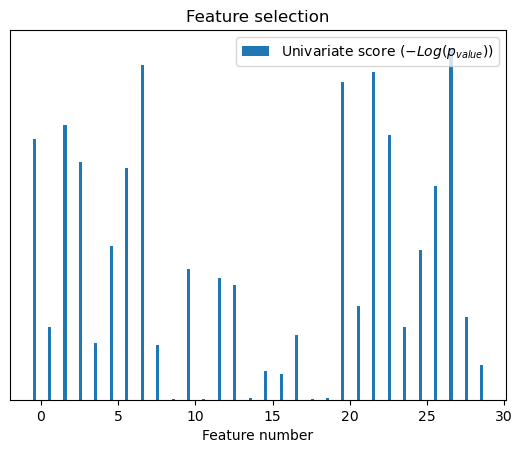

In [61]:
# 绘制特征选择图
plt.figure(1)
plt.clf()
x_indices = np.arange(x_train.shape[-1])
scores = -np.log10(selector.pvalues_)
scores /= scores.max()
plt.bar(x_indices - .45, scores, width=.2, label=r'Univariate score ($-Log(p_{value})$)')
plt.title("Feature selection")
plt.xlabel('Feature number')
plt.yticks(())
plt.axis('tight')
plt.legend(loc='upper right')
plt.show()

# 嵌入式特征选择

嵌入式特征选择，就是通过一些特殊的模型拟合数据然后根据模型自身的某些对于特征的评价的属性来作为评价指标，最后再使用包裹式的特征选择方法来选择，当然，很多时候我们还是仅停留在计算出评价指标的阶段，因为包裹式特征选择的最大问题就是计算量和时间是三者之中最大的。

最常用的进行嵌入式特征选择的模型：树模型和带正则项的模型（线性回归、逻辑回归、svm、svr、神经网络等）。

In [58]:
# 随机森林的特征重要性
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

model = RandomForestClassifier(random_state = 0)
param_grid = {'max_depth': [5, 10, 15], 'n_estimators': [10, 50, 100]}

# GridSearchCV优化参数、训练模型
gsearch = GridSearchCV(model, param_grid)
model = gsearch.fit(x_train, y_train)

# 打印最优结果
print('RandomForest params:', model.best_estimator_)

RandomForest params: RandomForestClassifier(max_depth=10, n_estimators=50, random_state=0)


In [59]:
forest = RandomForestClassifier(max_depth=10, n_estimators=50, random_state=0)
forest.fit(x_train, y_train)
forest.feature_importances_ # 特征重要性

array([0.030437  , 0.01271943, 0.02963404, 0.04373559, 0.00283017,
       0.0024759 , 0.05222278, 0.09263968, 0.00318368, 0.00400532,
       0.03272393, 0.00565687, 0.01554212, 0.03770175, 0.00268446,
       0.00659989, 0.00399327, 0.00603836, 0.00497851, 0.00635845,
       0.09732282, 0.0192155 , 0.11589386, 0.06164254, 0.01439712,
       0.01640329, 0.02810356, 0.2283326 , 0.0116641 , 0.01086343])

Text(0, 0.5, 'Feature')

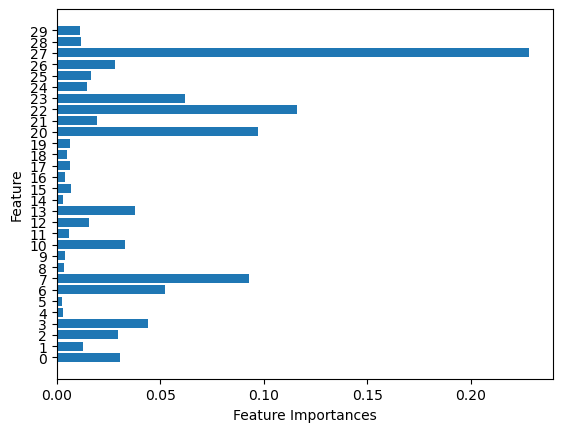

In [60]:
can = {n:v for n,v in zip(data.columns,forest.feature_importances_)}
plt.barh(list(can.keys()),list(can.values()),align = 'center')
plt.xlabel("Feature Importances")
plt.ylabel("Feature")

In [68]:
# 特征重要性最大的前10个
feature_importances = forest.feature_importances_ 
np.argsort(-feature_importances)[:10]

array([27, 22, 20,  7, 23,  6,  3, 13, 10,  0], dtype=int64)